# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)
advance_payments: Amount paid by the customer in advance by cash (in 100s)
probability_of_full_payment: Probability of payment done in full by the customer to the bank
current_balance: Balance amount left in the account to make purchases (in 1000s)
credit_limit: Limit of the amount in credit card (10000s)
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.getcwd()
os.chdir('C:\\Users\\Neha Mishra\\Downloads')

In [4]:
bank = pd.read_csv("bank_marketing_part1_Data.csv")

In [5]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [8]:
bank_columns = bank.columns
bank_columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

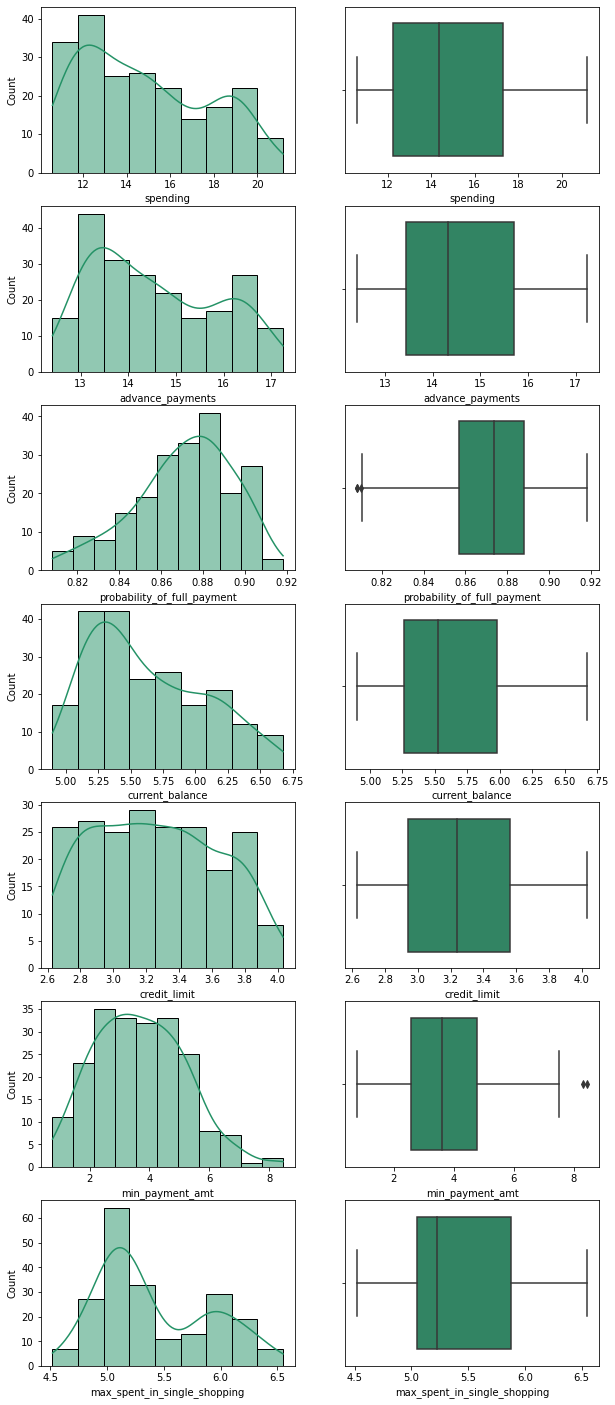

In [9]:
fig,axes = plt.subplots(nrows = 7,ncols = 2)
fig.set_size_inches(10,25)
sns.set_palette("summer")
sns.histplot(bank["spending"],kde = True,ax=axes[0][0])
sns.boxplot(x="spending",data=bank,ax=axes[0][1])
sns.histplot(bank["advance_payments"],kde = True,ax=axes[1][0])
sns.boxplot(x="advance_payments",data=bank,ax=axes[1][1])
sns.histplot(bank["probability_of_full_payment"],kde = True,ax=axes[2][0])
sns.boxplot(x="probability_of_full_payment",data=bank,ax=axes[2][1])
sns.histplot(bank["current_balance"],kde = True,ax=axes[3][0])
sns.boxplot(x="current_balance",data=bank,ax=axes[3][1])
sns.histplot(bank["credit_limit"],kde = True,ax=axes[4][0])
sns.boxplot(x="credit_limit",data=bank,ax=axes[4][1])
sns.histplot(bank["min_payment_amt"],kde = True,ax=axes[5][0])
sns.boxplot(x="min_payment_amt",data=bank,ax=axes[5][1])
sns.histplot(bank["max_spent_in_single_shopping"],kde = True,ax=axes[6][0])
sns.boxplot(x="max_spent_in_single_shopping",data=bank,ax=axes[6][1])

plt.show()

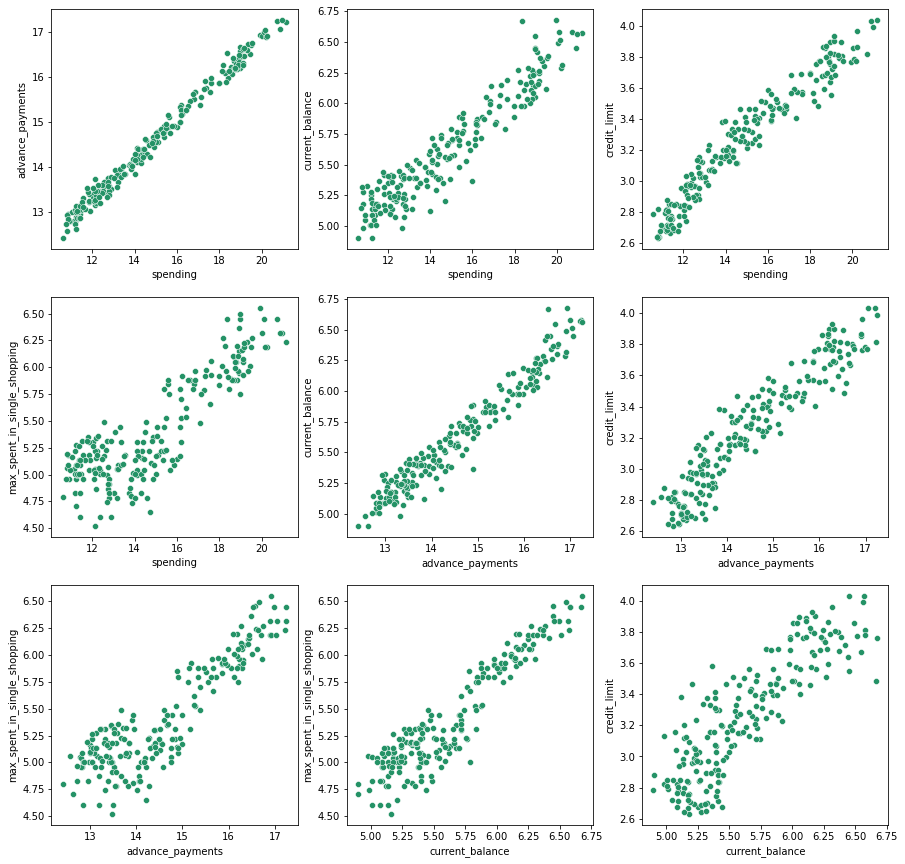

In [10]:
fig,axes = plt.subplots(nrows = 3,ncols = 3)
fig.set_size_inches(15,15)
sns.set_palette("Oranges")
sns.scatterplot(bank["spending"],bank["advance_payments"],ax=axes[0][0])
sns.scatterplot(bank["spending"],bank["current_balance"],ax=axes[0][1])
sns.scatterplot(bank["spending"],bank["credit_limit"],ax=axes[0][2])
sns.scatterplot(bank["spending"],bank["max_spent_in_single_shopping"],ax=axes[1][0])
sns.scatterplot(bank["advance_payments"],bank["current_balance"],ax=axes[1][1])
sns.scatterplot(bank["advance_payments"],bank["credit_limit"],ax=axes[1][2])
sns.scatterplot(bank["advance_payments"],bank["max_spent_in_single_shopping"],ax=axes[2][0])
sns.scatterplot(bank["current_balance"],bank["max_spent_in_single_shopping"],ax=axes[2][1])
sns.scatterplot(bank["current_balance"],bank["credit_limit"],ax=axes[2][2])
plt.show()

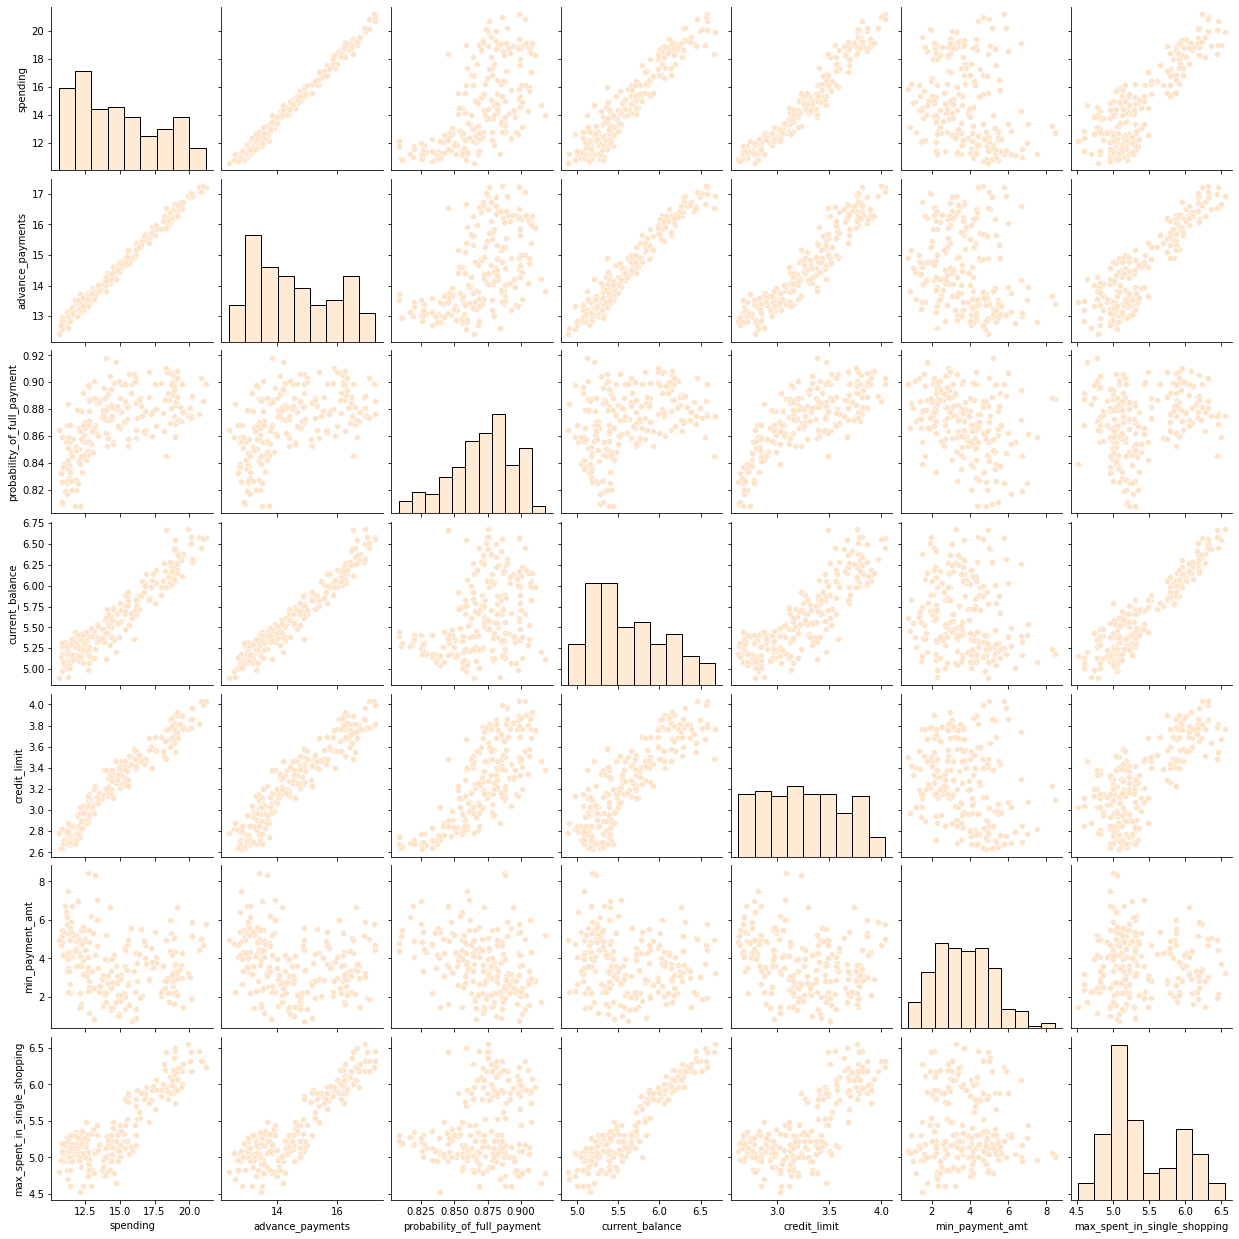

In [11]:
sns.pairplot(bank)
sns.set_palette("magma")

<AxesSubplot:>

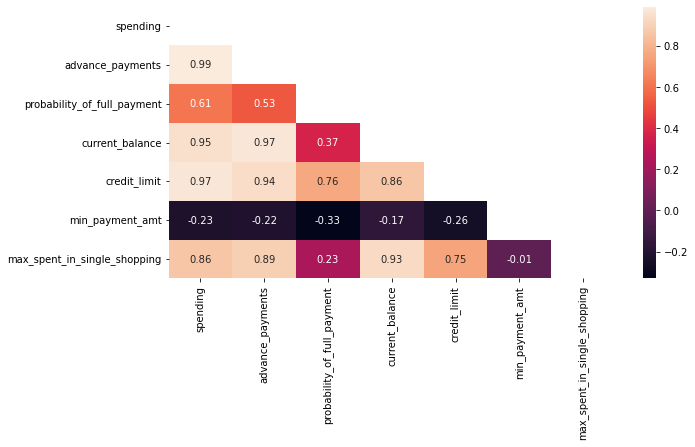

In [12]:
corr = bank.corr()
round(corr,2)
fig_dims = (10, 5)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)

# 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_bank = sc.fit_transform(bank)

In [14]:
sc_bank

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [15]:
scaled_bank = pd.DataFrame(sc_bank,columns=bank_columns)
scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them


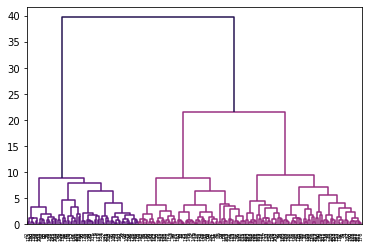

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(sc_bank, method = 'ward')
dend = dendrogram(wardlink)

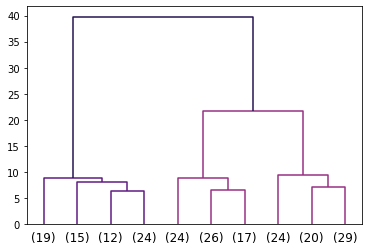

In [17]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [18]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [19]:
bank['clusters_hierarchy'] = clusters

In [20]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [21]:

bank[bank["clusters_hierarchy"] == 1]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
10,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,1
...,...,...,...,...,...,...,...,...
198,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,1
201,17.08,15.38,0.9079,5.832,3.683,2.956,5.484,1
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,1
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1


In [22]:
bank[bank["clusters_hierarchy"] == 2]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
12,12.15,13.45,0.8443,5.417,2.837,3.638,5.338,2
...,...,...,...,...,...,...,...,...
189,11.75,13.52,0.8082,5.444,2.678,4.378,5.310,2
192,12.26,13.60,0.8333,5.408,2.833,4.756,5.360,2
197,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,2
199,12.01,13.52,0.8249,5.405,2.776,6.992,5.270,2


In [23]:
bank[bank["clusters_hierarchy"] == 3]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3
11,14.09,14.41,0.8529,5.717,3.186,3.920,5.299,3
14,12.10,13.15,0.8793,5.105,2.941,2.201,5.056,3
16,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,3
...,...,...,...,...,...,...,...,...
200,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,3
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309,3
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3


In [24]:
bank.groupby("clusters_hierarchy").mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters_hierarchy,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [25]:
from sklearn.cluster import KMeans

In [26]:

k_means = KMeans(n_clusters = 2)

In [27]:

k_means.fit(sc_bank)

KMeans(n_clusters=2)

In [28]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [29]:
wss =[]

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(sc_bank)
    wss.append(KM.inertia_)

In [30]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 327.44250470083705,
 289.80038672405186,
 263.67352241073183,
 239.86342920644123,
 222.71357417164845,
 207.4700480913574]

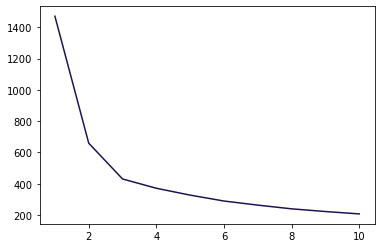

In [31]:
plt.plot(range(1,11), wss)

In [32]:
k_means = KMeans(n_clusters = 3)
k_means.fit(sc_bank)
labels = k_means.labels_


In [33]:
bank["Clus_kmeans"] = labels
bank.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [34]:
bank[bank["Clus_kmeans"] == 0]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy,Clus_kmeans
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2,0
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,0
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,0
12,12.15,13.45,0.8443,5.417,2.837,3.638,5.338,2,0
...,...,...,...,...,...,...,...,...,...
190,11.23,12.63,0.8840,4.902,2.879,2.269,4.703,3,0
192,12.26,13.60,0.8333,5.408,2.833,4.756,5.360,2,0
197,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,2,0
199,12.01,13.52,0.8249,5.405,2.776,6.992,5.270,2,0


In [35]:

bank[bank["Clus_kmeans"] == 1]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,1
10,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,1,1
...,...,...,...,...,...,...,...,...,...
196,18.76,16.20,0.8984,6.172,3.796,3.120,6.053,1,1
198,19.18,16.63,0.8717,6.369,3.681,3.357,6.229,1,1
201,17.08,15.38,0.9079,5.832,3.683,2.956,5.484,1,1
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,1,1


In [36]:
bank[bank["Clus_kmeans"] == 2]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy,Clus_kmeans
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3,2
11,14.09,14.41,0.8529,5.717,3.186,3.920,5.299,3,2
14,12.10,13.15,0.8793,5.105,2.941,2.201,5.056,3,2
16,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,3,2
...,...,...,...,...,...,...,...,...,...
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309,3,2
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3,2
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3,2
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1,2


In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
silhouette_score(sc_bank,labels)

0.40072705527512986

In [39]:
sil_width = silhouette_samples(bank,labels)

In [40]:
bank["sil_width"] = sil_width
bank.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.652551
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.421256
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.698299
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.663868
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.513627


In [41]:
silhouette_samples(bank,labels).min()

-0.11488991832485351

In [42]:

bank.groupby("Clus_kmeans").mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchy,sil_width
Clus_kmeans,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,0.556698
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.545993
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.457054


# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters

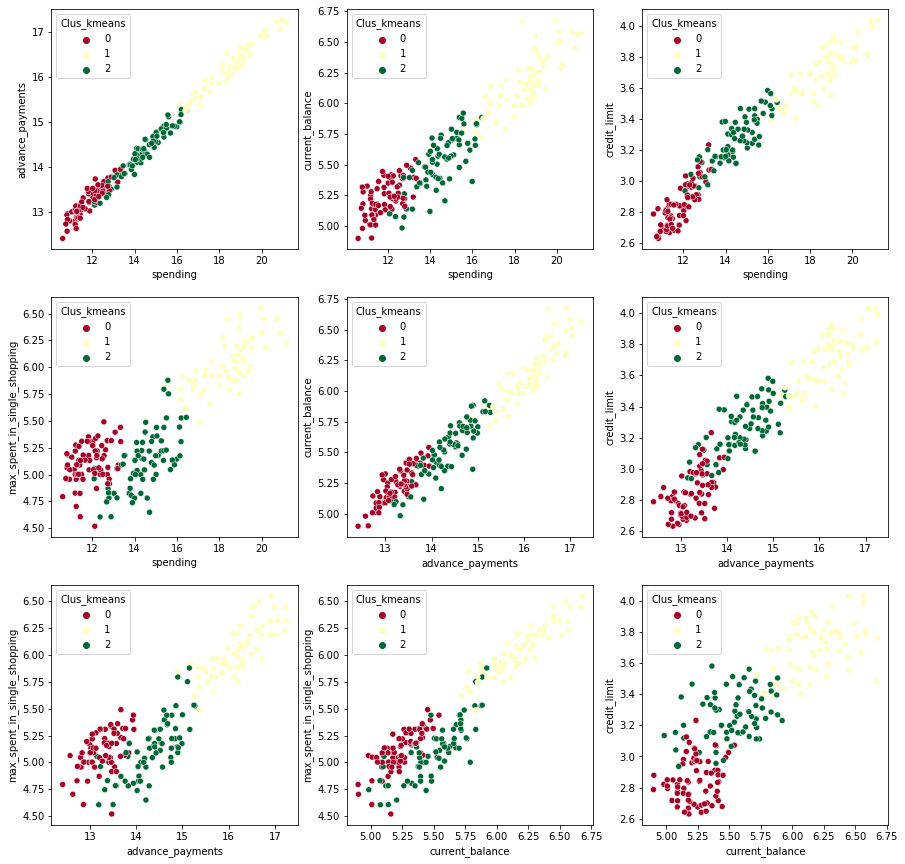

In [43]:
fig,axes = plt.subplots(nrows = 3,ncols = 3)
fig.set_size_inches(15,15)
sns.scatterplot(x="spending",y="advance_payments",hue="Clus_kmeans",data = bank,ax=axes[0][0],palette="RdYlGn")
sns.scatterplot(x="spending",y="current_balance",hue="Clus_kmeans",data = bank,ax=axes[0][1],palette="RdYlGn")
sns.scatterplot(x="spending",y="credit_limit",hue="Clus_kmeans",data = bank,ax=axes[0][2],palette="RdYlGn")
sns.scatterplot(x="spending",y="max_spent_in_single_shopping",hue="Clus_kmeans",data = bank,ax=axes[1][0],palette="RdYlGn")
sns.scatterplot(x="advance_payments",y="current_balance",hue="Clus_kmeans",data = bank,ax=axes[1][1],palette="RdYlGn")
sns.scatterplot(x="advance_payments",y="credit_limit",hue="Clus_kmeans",data = bank,ax=axes[1][2],palette="RdYlGn")
sns.scatterplot(x="advance_payments",y="max_spent_in_single_shopping",hue="Clus_kmeans",data = bank,ax=axes[2][0],palette="RdYlGn")
sns.scatterplot(x="current_balance",y="max_spent_in_single_shopping",hue="Clus_kmeans",data = bank,ax=axes[2][1],palette="RdYlGn")
sns.scatterplot(x="current_balance",y="credit_limit",hue="Clus_kmeans",data = bank,ax=axes[2][2],palette="RdYlGn")
plt.show()

# The End

# Problem 2- Insurance part 2

In [44]:
# ------- Import the required modules and libraries ------------###########

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing as ppr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn import metrics
get_ipython().run_line_magic('matplotlib', 'inline')

In [45]:
import os
os.getcwd()
os.chdir('C:\\Users\\Neha Mishra\\Downloads')

In [46]:
######-------------------------------  Import the data and preprocess --------------------------#########
Insurance = pd.read_csv("insurance_part2_Data.csv") #Importing of Dataset

In [47]:
Insurance.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [48]:
Insurance.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [49]:
Insurance.info

<bound method DataFrame.info of       Age Agency_Code           Type Claimed  Commision Channel  Duration  \
0      48         C2B       Airlines      No       0.70  Online         7   
1      36         EPX  Travel Agency      No       0.00  Online        34   
2      39         CWT  Travel Agency      No       5.94  Online         3   
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
...   ...         ...            ...     ...        ...     ...       ...   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2998   34         C2B       Airlines     Yes       7.64  Online        39   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales       Product Name Destination

In [50]:
Insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [51]:
Insurance['Agency_Code'] = Insurance['Agency_Code'].astype('category')
Insurance['Type'] = Insurance['Type'].astype('category')
Insurance['Claimed'] = Insurance['Claimed'].astype('category')
Insurance['Channel'] = Insurance['Channel'].astype('category')
Insurance['Product Name'] = Insurance['Product Name'].astype('category')
Insurance['Destination'] = Insurance['Destination'].astype('category')

<AxesSubplot:title={'center':'Destination vs Claims'}, xlabel='Destination', ylabel='count'>

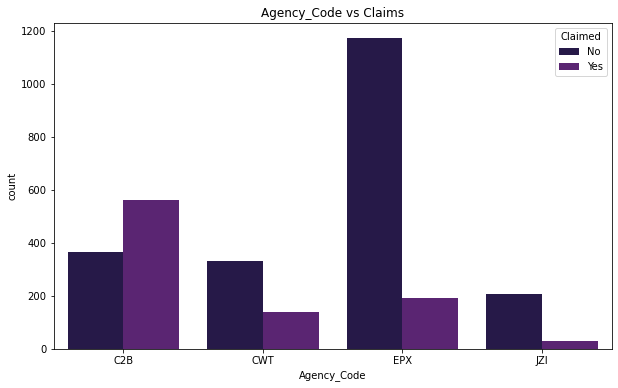

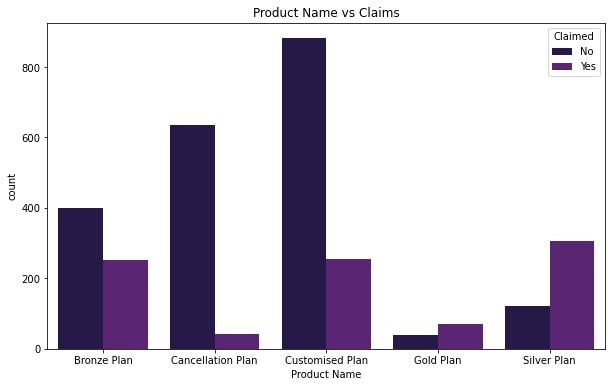

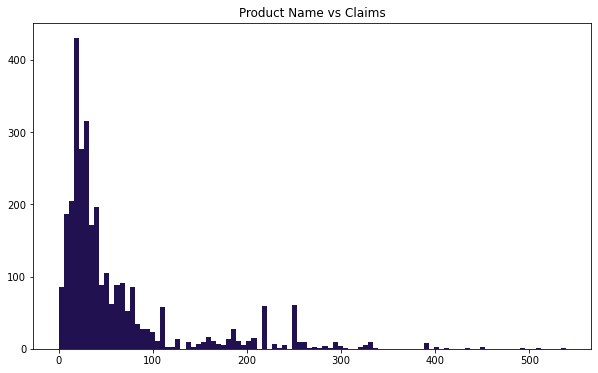

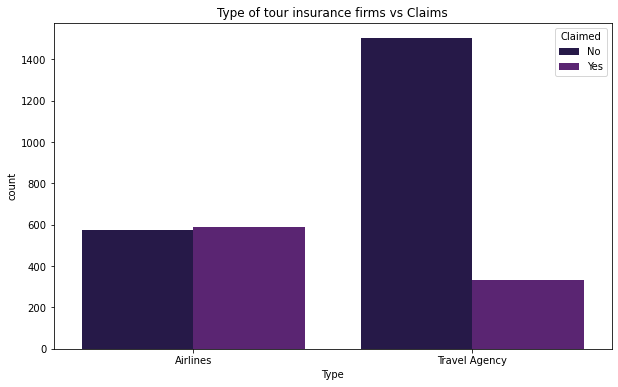

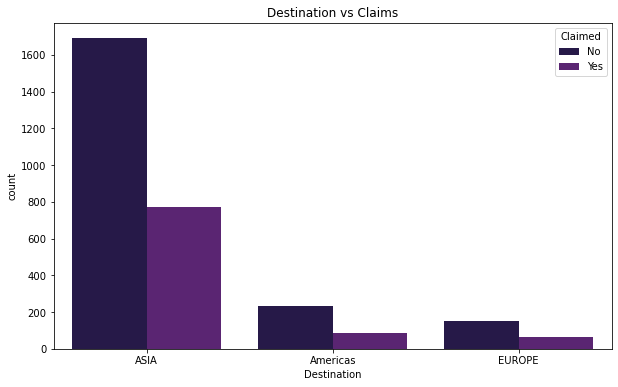

In [52]:
### ----- Exploratory Data Analysis --------------------------------------####

plt.figure(figsize =(10, 6)) 
plt.title('Agency_Code vs Claims')
sns.countplot(Insurance['Agency_Code'],hue=Insurance['Claimed'],orient="h")

plt.figure(figsize =(10, 6)) 
plt.title('Product Name vs Claims')
sns.countplot(Insurance['Product Name'],hue=Insurance['Claimed'],orient="h")

plt.figure(figsize =(10, 6)) 
plt.title('Product Name vs Claims')
plt.hist(Insurance['Sales'],bins=100)

plt.figure(figsize =(10, 6)) 
plt.title('Type of tour insurance firms vs Claims')
sns.countplot(Insurance['Type'],hue=Insurance['Claimed'],orient="h")

plt.figure(figsize =(10, 6)) 
plt.title('Destination vs Claims')
sns.countplot(Insurance['Destination'],hue=Insurance['Claimed'],orient="h")


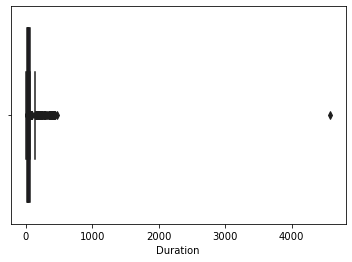

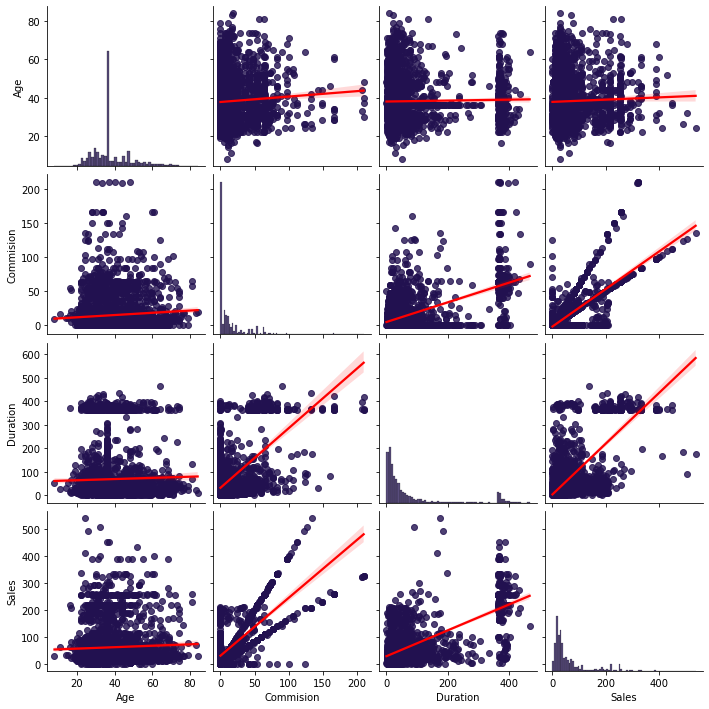

In [53]:
#----------- Outlier Treatment ------------------------########

sns.boxplot(data=Insurance.loc[:,Insurance.columns!='Duration'],orient="h")
sns.boxplot(Insurance['Duration'])

Insurance['Duration'].max()
Insurance['Duration'].min()
Insurance = Insurance.drop(Insurance['Duration'].idxmax())
Insurance = Insurance.drop(Insurance['Duration'].idxmin())
Insurance = Insurance.drop(Insurance['Commision'].idxmax())

Insurance = Insurance.drop('Channel',1)



sns.pairplot(Insurance,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [54]:
###--------------- Splitting to training and Testing data ------------------#####

X = Insurance.drop('Claimed',axis=1)
Y = Insurance.Claimed

X_Train , x_test , y_Train , y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

X_Train.head()

lenc = LabelEncoder()
X_Train = X_Train.apply(lenc.fit_transform)
x_test = x_test.apply(lenc.fit_transform)

RFX_Train = pd.get_dummies(X_Train)
RFX_Train.head()
RFx_test = pd.get_dummies(x_test)

[Text(148.8, 190.26, 'X[1] <= 0.5\ngini = 0.424\nsamples = 2097\nvalue = [1458, 639]'),
 Text(74.4, 135.9, 'X[5] <= 33.5\ngini = 0.475\nsamples = 650\nvalue = [252, 398]'),
 Text(37.2, 81.53999999999999, 'gini = 0.306\nsamples = 69\nvalue = [56, 13]'),
 Text(111.60000000000001, 81.53999999999999, 'X[4] <= 102.5\ngini = 0.447\nsamples = 581\nvalue = [196, 385]'),
 Text(74.4, 27.180000000000007, 'gini = 0.484\nsamples = 409\nvalue = [168, 241]'),
 Text(148.8, 27.180000000000007, 'gini = 0.273\nsamples = 172\nvalue = [28, 144]'),
 Text(223.20000000000002, 135.9, 'X[5] <= 87.0\ngini = 0.278\nsamples = 1447\nvalue = [1206, 241]'),
 Text(186.0, 81.53999999999999, 'gini = 0.158\nsamples = 830\nvalue = [758, 72]'),
 Text(260.40000000000003, 81.53999999999999, 'X[6] <= 2.5\ngini = 0.398\nsamples = 617\nvalue = [448, 169]'),
 Text(223.20000000000002, 27.180000000000007, 'gini = 0.372\nsamples = 578\nvalue = [435, 143]'),
 Text(297.6, 27.180000000000007, 'gini = 0.444\nsamples = 39\nvalue = [13, 

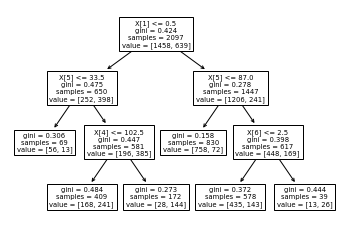

In [55]:
#######--########--- First Part : CART (Classification Decision TREE) ---------------#####

CART = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=3)

CARTModel = CART.fit(X=X_Train,y=y_Train)

path = CARTModel.cost_complexity_pruning_path(X_Train,y_Train)
ccp_alphas, impurities = path.ccp_alphas , path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

feat_imp = pd.Series(CARTModel.feature_importances_,index=X_Train.columns)
feat_imp.plot(kind='barh')

CART = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=3,ccp_alpha=0.004)
CARTModel = CART.fit(X=X_Train,y=y_Train)

plot_tree(CARTModel)

In [56]:
## ------- Predict ----------####

y_predtest = CARTModel.predict(x_test)
y_probtest = CARTModel.predict_proba(x_test)


              precision    recall  f1-score   support

          No       0.80      0.87      0.83       616
         Yes       0.65      0.54      0.59       284

    accuracy                           0.76       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.75      0.76      0.76       900



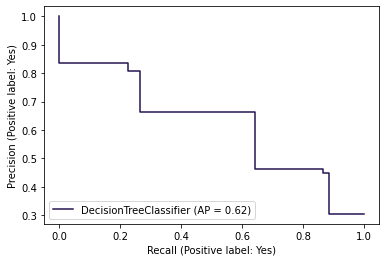

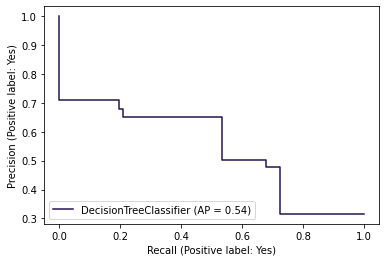

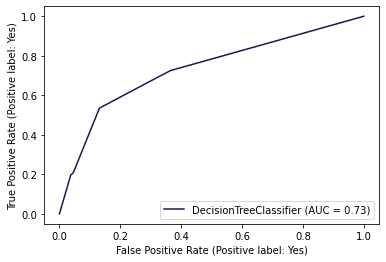

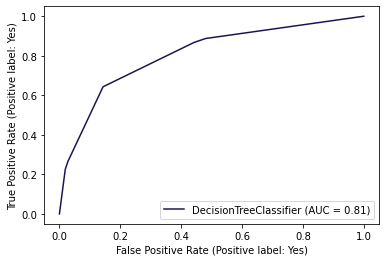

In [57]:
## -------- Model Validation ------------###

cf = metrics.confusion_matrix(y_test,y_predtest)
metrics.ConfusionMatrixDisplay(cf)

metrics.accuracy_score(y_test,y_predtest)

y_predTrain = CARTModel.predict(X_Train)
y_probTrain = CARTModel.predict_proba(X_Train)
metrics.accuracy_score(y_Train,y_predTrain)

metrics.plot_precision_recall_curve(CARTModel,X_Train,y_Train)
metrics.plot_precision_recall_curve(CARTModel,x_test,y_test)

print(metrics.classification_report(y_test,y_predtest))
metrics.plot_roc_curve(CARTModel,x_test,y_test)
metrics.plot_roc_curve(CARTModel,X_Train,y_Train)


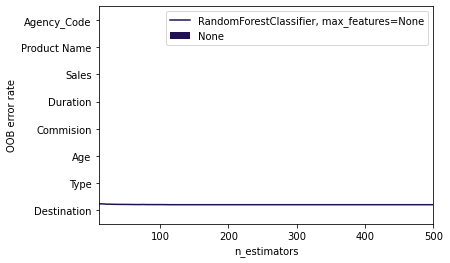

In [58]:
######-----########--------#### Second part : Random Forest (Classification Decision TREE) --------#######-----------#########

RF = RandomForestClassifier(n_estimators=501,oob_score=True,criterion="gini",min_samples_leaf=10,random_state=42,max_features=4)

RFModel = RF.fit(X=RFX_Train,y=y_Train)

RFModel.get_params()

feat_imp = pd.Series(RFModel.feature_importances_,index=RFX_Train.columns)
feat_imp = feat_imp.sort_values()
feat_imp.plot(kind='barh')

ensemble_clfs = [ ("RandomForestClassifier, max_features=None",RandomForestClassifier(warm_start=True, max_features=None, oob_score=True,criterion="gini",min_samples_leaf=10,random_state=42))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
min_estimators = 10
max_estimators = 500

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X=RFX_Train,y=y_Train)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
    
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [59]:
#-------------- Predict--------------####

y_predtest = RFModel.predict(RFx_test)
y_probtest = RFModel.predict_proba(RFx_test)

cf = metrics.confusion_matrix(y_test,y_predtest)
cf

metrics.accuracy_score(y_test,y_predtest)

y_predTrain = RFModel.predict(RFX_Train)
y_probTrain = RFModel.predict_proba(RFX_Train)
metrics.accuracy_score(y_Train,y_predTrain)


0.8254649499284692

              precision    recall  f1-score   support

          No       0.80      0.88      0.84       616
         Yes       0.67      0.52      0.58       284

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



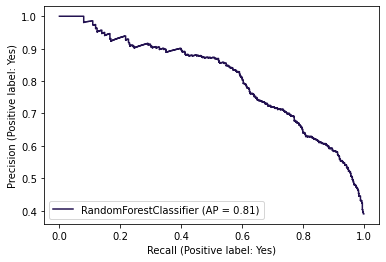

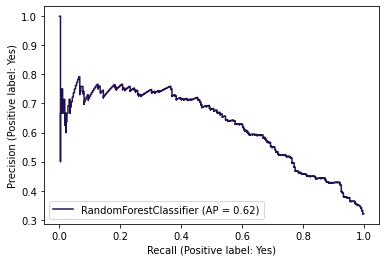

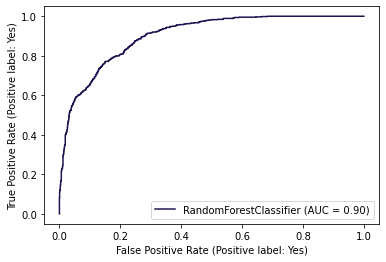

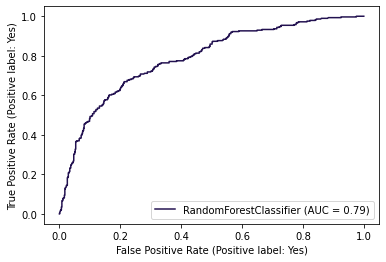

In [60]:
#-----------Model Validation ---------------####

metrics.plot_precision_recall_curve(RFModel,RFX_Train,y_Train)
metrics.plot_precision_recall_curve(RFModel,RFx_test,y_test)

print(metrics.classification_report(y_test,y_predtest))
metrics.plot_roc_curve(RFModel,RFX_Train,y_Train)
metrics.plot_roc_curve(RFModel,RFx_test,y_test)

In [61]:
####-----######------------- THIRD PART : Artificial Nueral Network ANN ----------------#######

## One Hot encoding and scaling

ANNY_Train = pd.get_dummies(y_Train)
ANNY_Train = pd.DataFrame(ANNY_Train)

ANNy_test = pd.get_dummies(y_test)
ANNy_test = pd.DataFrame(ANNy_test)

In [62]:
# Scale the data

scaler = StandardScaler()

ANNX_Train = scaler.fit_transform(RFX_Train)
ANNX_Train = pd.DataFrame(ANNX_Train,columns=RFX_Train.columns)

ANNx_test = scaler.fit_transform(RFx_test)
ANNx_test = pd.DataFrame(ANNx_test,columns=RFx_test.columns)

#annclf = MLPClassifier(,max_iter=150000,random_state=1,verbose=10,alpha=0.0001,tol=0.00001)
annclf = MLPClassifier(max_iter=150000,random_state=1)


In [63]:
#####  Using gridcv to find best hyperparameters for the nueral network   ####

parameter_space ={'hidden_layer_sizes':[(9,4),(9,3),(9,2),(8,4),(8,3),(8,2),(7,3),(7,2),(6,3),(6,2),(5,2),(4,2)],
                 'activation':['relu','logistic','tanh'],
                 'solver': ['sgd' , 'adam'],
                 'alpha' : [0.0001 , 0.05],
                 'learning_rate' : ['constant','adaptive']}

clf = GridSearchCV(annclf,parameter_space,n_jobs=-1,cv=10)
clf.fit(ANNX_Train,ANNY_Train['Yes'])

print('Best parameters found for ANN : \n', clf.best_params_)

Best parameters found for ANN : 
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (9, 2), 'learning_rate': 'constant', 'solver': 'adam'}


Iteration 1, loss = 0.67972655
Iteration 2, loss = 0.65038774
Iteration 3, loss = 0.62620428
Iteration 4, loss = 0.60682500
Iteration 5, loss = 0.59015503
Iteration 6, loss = 0.57538827
Iteration 7, loss = 0.56220179
Iteration 8, loss = 0.55068777
Iteration 9, loss = 0.54028024
Iteration 10, loss = 0.53171360
Iteration 11, loss = 0.52375195
Iteration 12, loss = 0.51711250
Iteration 13, loss = 0.51125315
Iteration 14, loss = 0.50614828
Iteration 15, loss = 0.50193592
Iteration 16, loss = 0.49831766
Iteration 17, loss = 0.49532211
Iteration 18, loss = 0.49269629
Iteration 19, loss = 0.49053353
Iteration 20, loss = 0.48858626
Iteration 21, loss = 0.48685342
Iteration 22, loss = 0.48542904
Iteration 23, loss = 0.48368448
Iteration 24, loss = 0.48231102
Iteration 25, loss = 0.48094131
Iteration 26, loss = 0.47976881
Iteration 27, loss = 0.47868222
Iteration 28, loss = 0.47760883
Iteration 29, loss = 0.47660334
Iteration 30, loss = 0.47565871
Iteration 31, loss = 0.47470878
Iteration 32, los

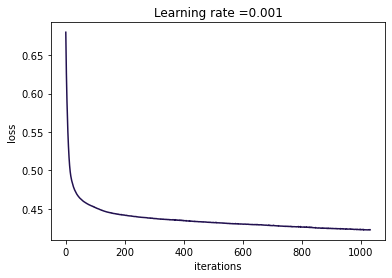

In [64]:
 #Running the nueral network with activation : Relu , alpha " 0.0001 , hidden layers (9,4), solver : adam and learning_rate constant

annclfinal = MLPClassifier(hidden_layer_sizes= (9,4), activation= 'relu',solver='adam',
                           alpha = 0.0001,learning_rate= 'constant', max_iter=150000,random_state=1,verbose=10,shuffle=True,tol=0.000001)

annmodel = annclfinal.fit(ANNX_Train,ANNY_Train['Yes'])

plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(annmodel.loss_curve_)
plt.show()

In [65]:
#####-- Predict ----------###

y_predtestann = annmodel.predict(ANNx_test)
y_probtestann = annmodel.predict_proba(ANNx_test)

cf = metrics.confusion_matrix(ANNy_test['Yes'],y_predtestann)

metrics.accuracy_score(ANNy_test['Yes'],y_predtestann)

y_predTrainann = annmodel.predict(ANNX_Train)
y_probTrainann = annmodel.predict_proba(ANNX_Train)
metrics.accuracy_score(ANNY_Train['Yes'],y_predTrainann)

0.8106819265617549

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       616
           1       0.66      0.59      0.62       284

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.77       900



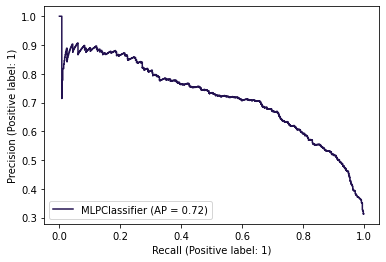

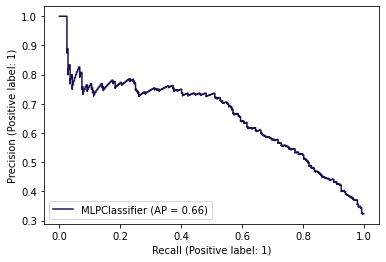

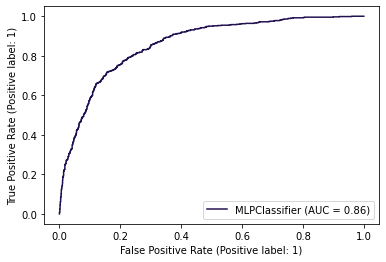

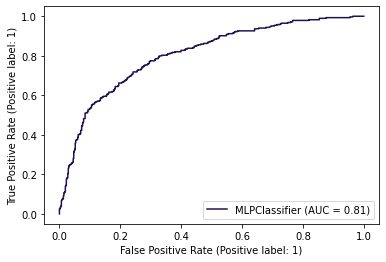

In [66]:
## Model Valdiation --####

metrics.plot_precision_recall_curve(annmodel,ANNX_Train,ANNY_Train['Yes'])
metrics.plot_precision_recall_curve(annmodel,ANNx_test,ANNy_test['Yes'])

print(metrics.classification_report(ANNy_test['Yes'],y_predtestann))
metrics.plot_roc_curve(annmodel,ANNX_Train,ANNY_Train['Yes'])
metrics.plot_roc_curve(annmodel,ANNx_test,ANNy_test['Yes'])

# The End